Dataset from https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# remove rows with missing values
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
data = data.join(pd.get_dummies(data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<Axes: >

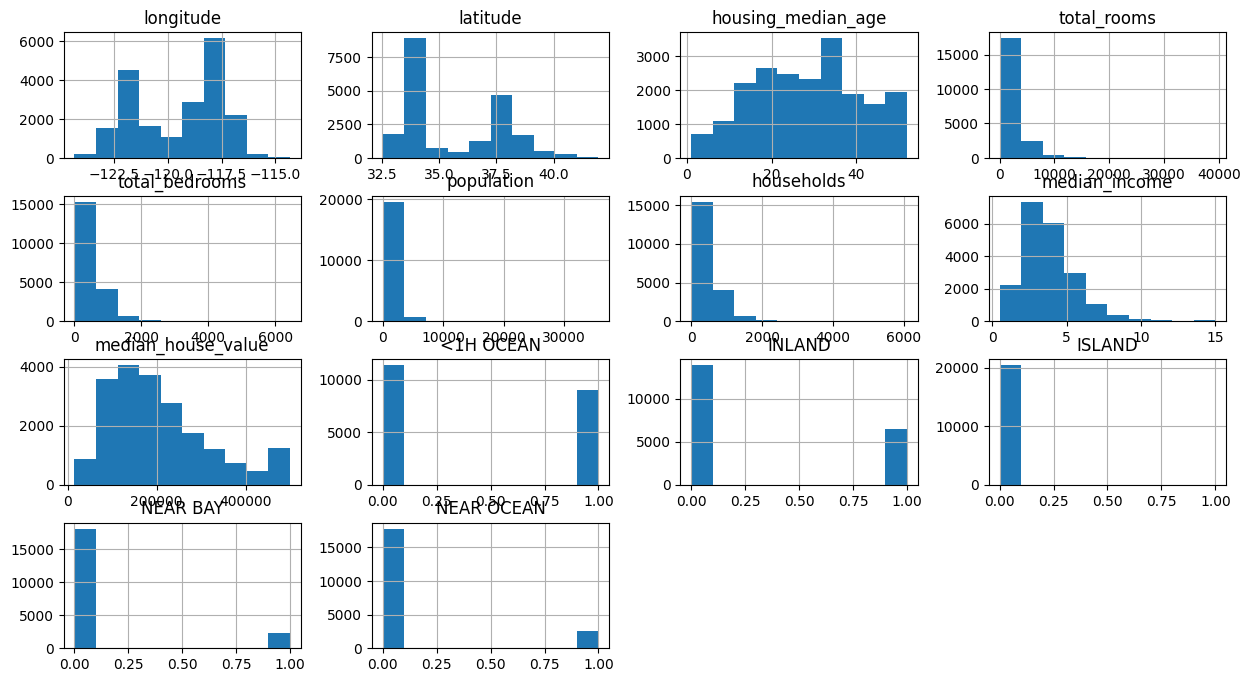

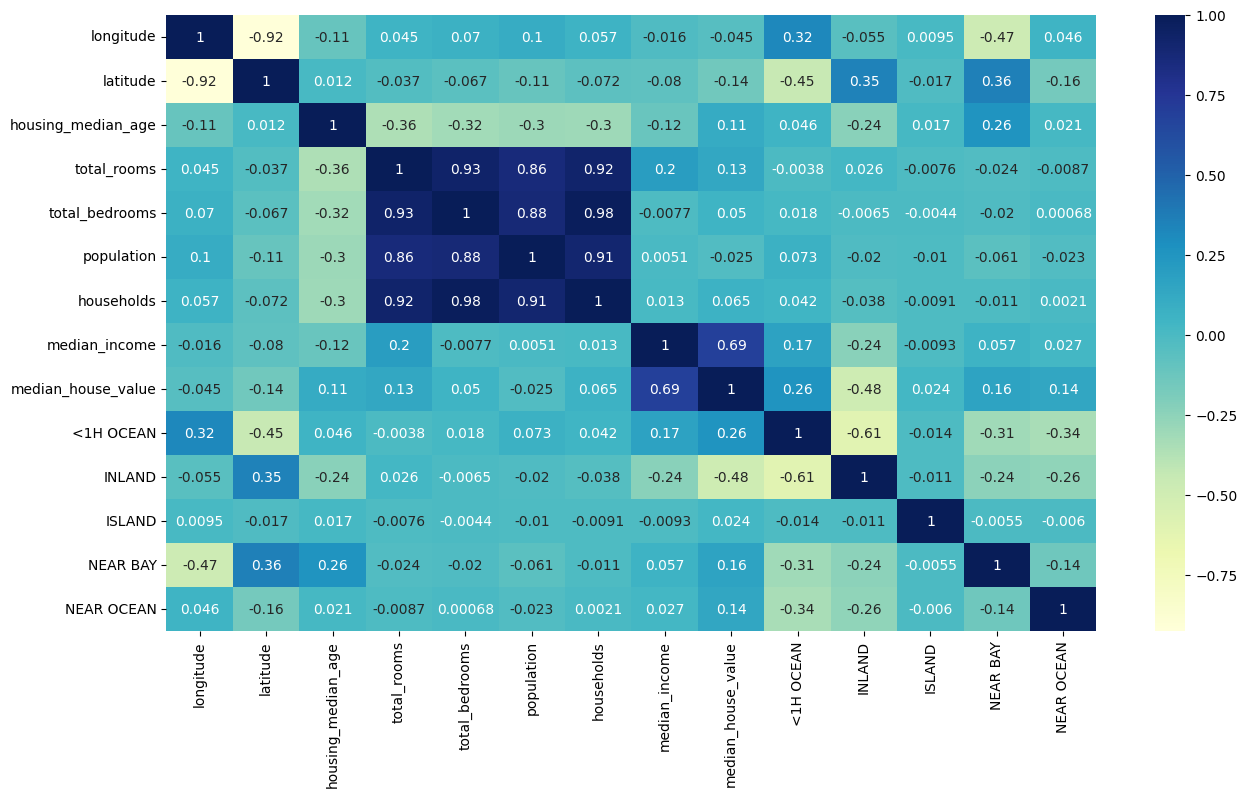

In [9]:
data.hist(figsize = (15,8))
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [10]:
# Feature Engineering
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
# how many rooms per household
data['household_rooms'] = data['total_rooms'] / data['households']

# my thought:
# consider population / # of bedrooms
data["population_per_bedroom"] = data["population"] / data["total_bedrooms"]

<Axes: >

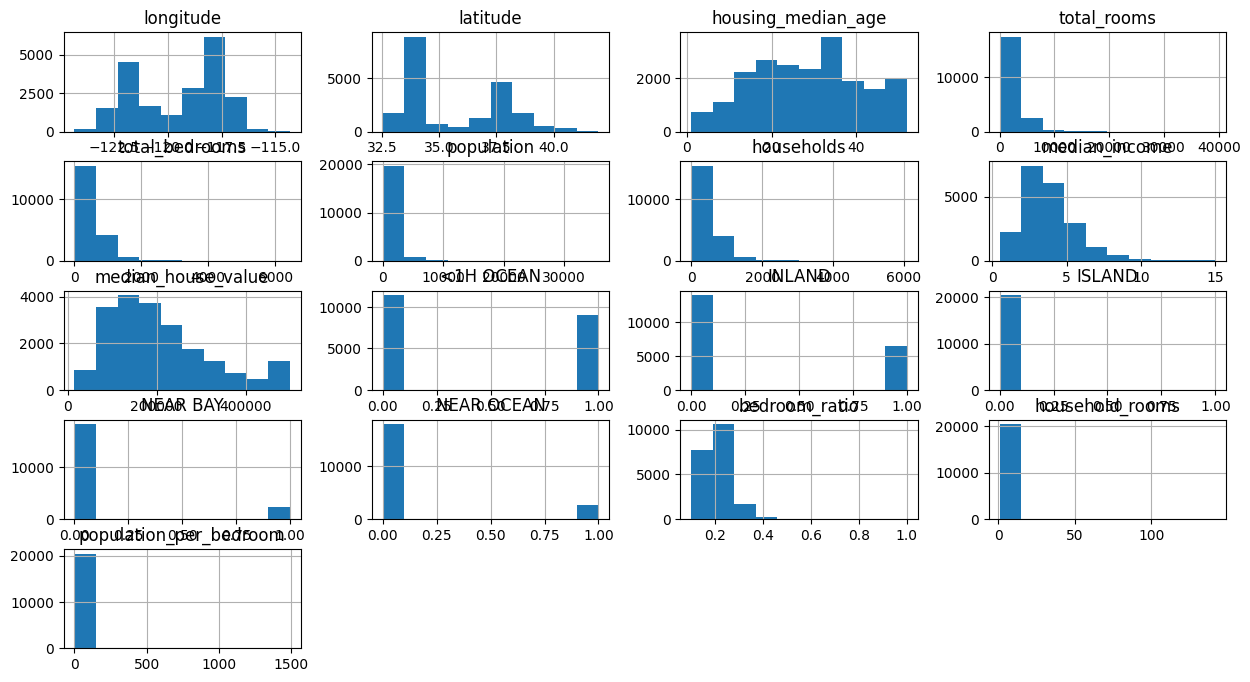

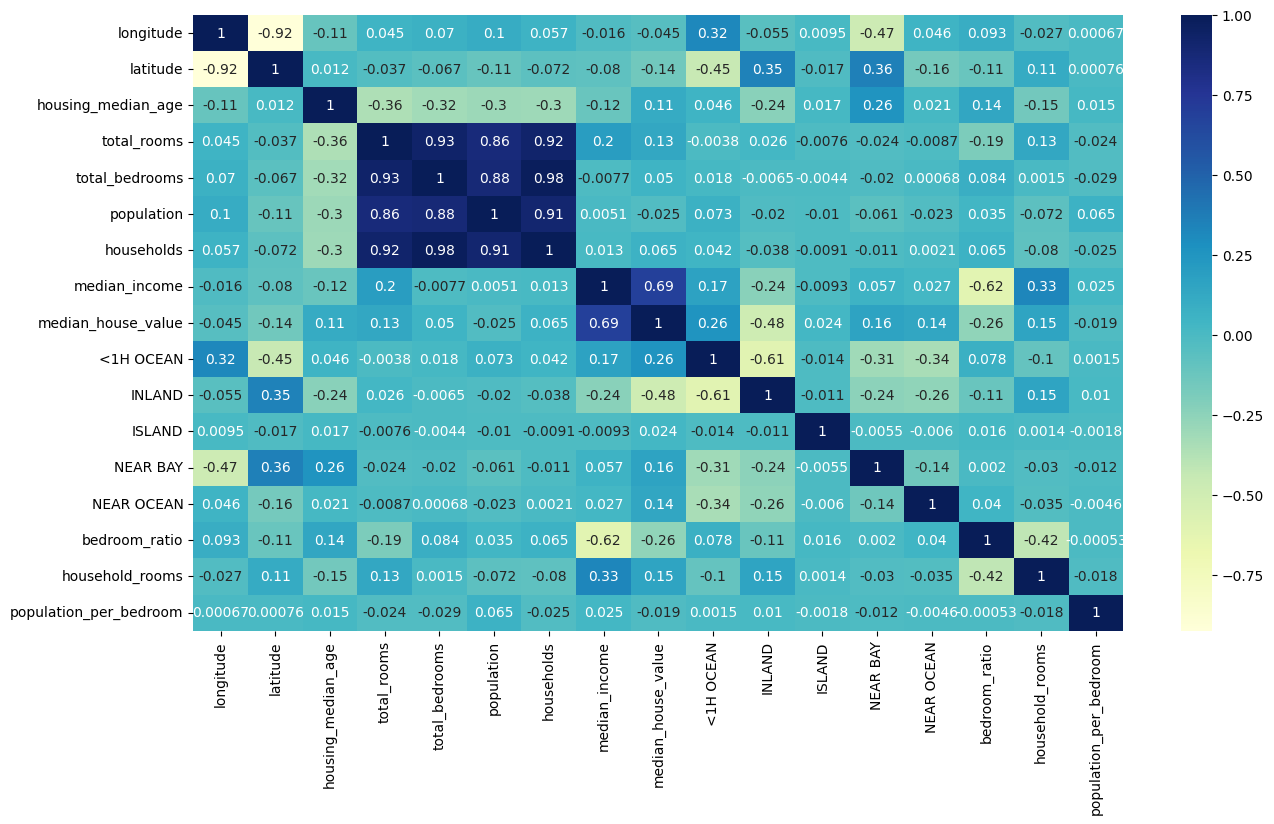

In [11]:
data.hist(figsize = (15,8))
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [12]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)
data['bedroom_ratio'] = np.log(data['bedroom_ratio'] + 1)
data['household_rooms'] = np.log(data['household_rooms'] + 1)
data['population_per_bedroom'] = np.log(data['population_per_bedroom'] + 1)

<Axes: >

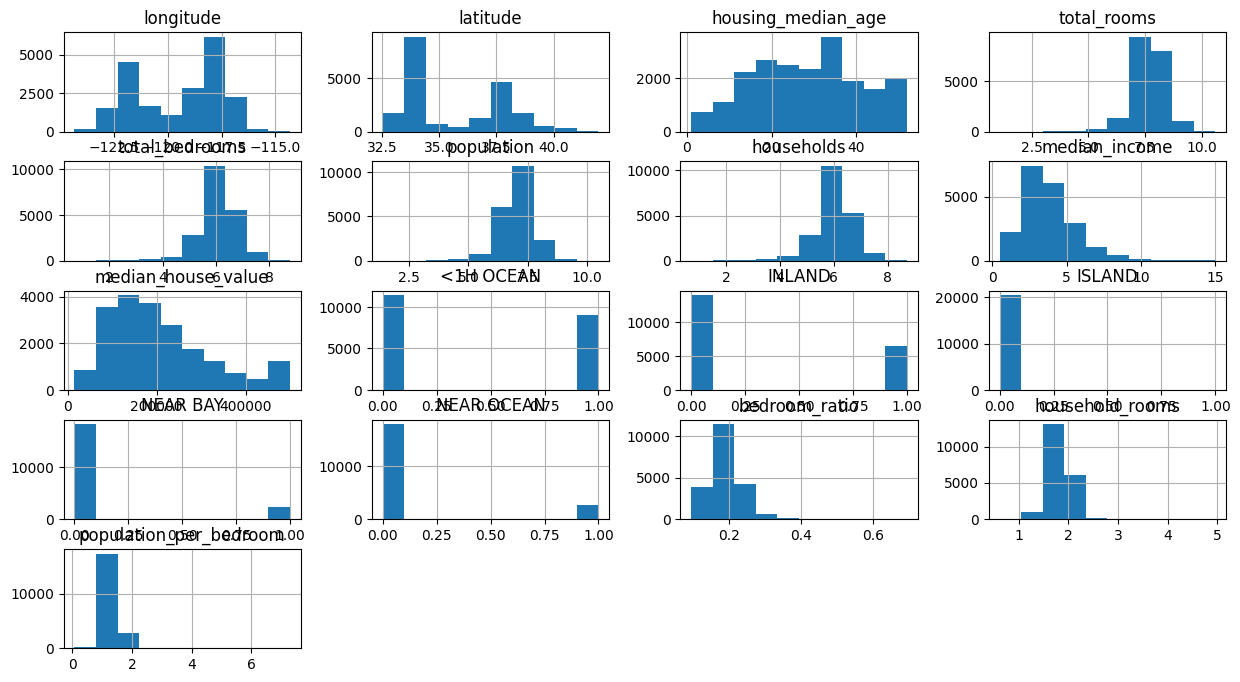

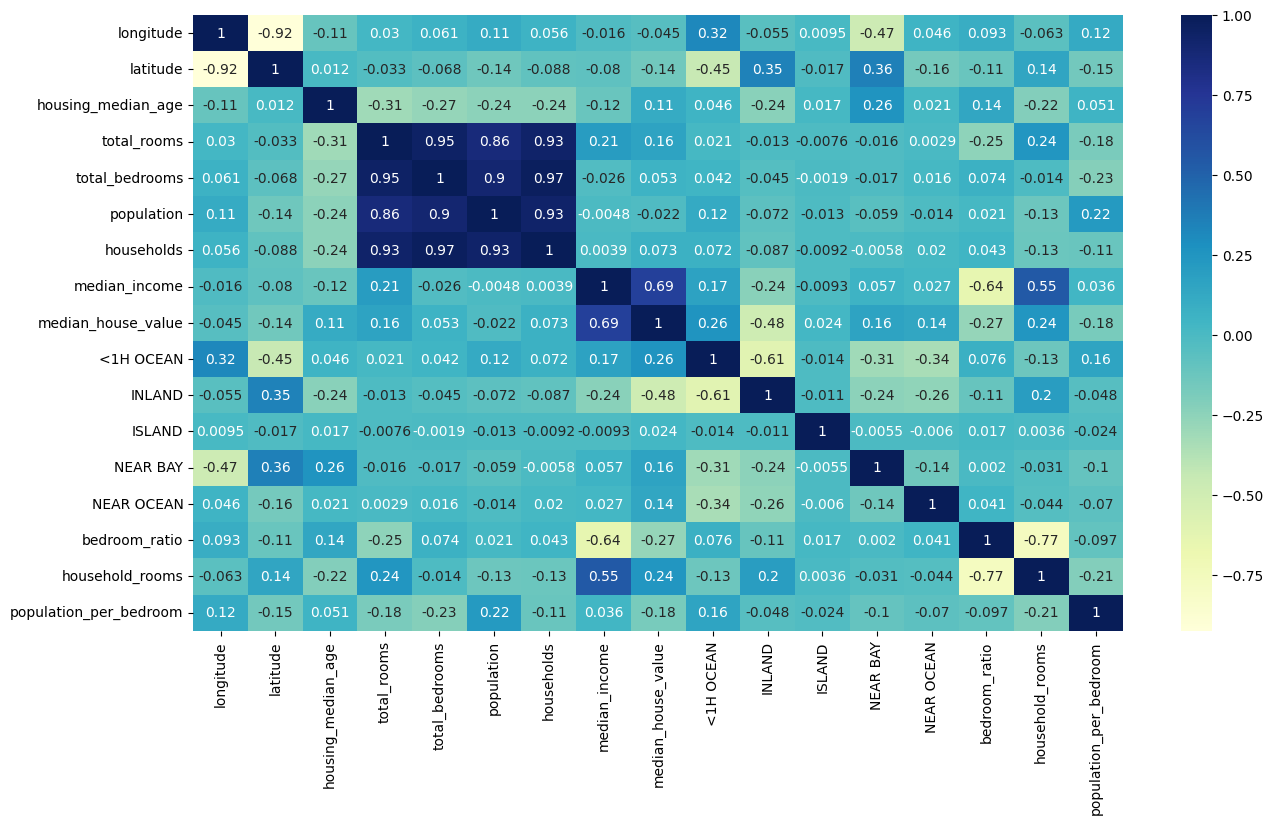

In [13]:
data.hist(figsize = (15,8))
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [14]:
# split data into features and target values
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Linear Regression without dropping features
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
print(reg.score(X_test_scaled, y_test))

0.6694291504992645


In [17]:
# drop features VERSION
# split data into features and target values
X = data.drop(['median_house_value', 'longitude', 'population', 'ISLAND'], axis=1)
y = data['median_house_value']
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
print(reg.score(X_test_scaled, y_test))

0.6641488376813337


In [23]:
# Random forest

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [24]:
forest.score(X_test_scaled, y_test)

0.7803742283514261

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300], # The number of decision trees running in the model
    "min_samples_split": [2, 4], # The minimum number of samples required to split an internal node
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [28]:
grid_search.best_estimator_.score(X_test_scaled, y_test)

0.78408463055635